# cdf of each person control condition eRNA

In [1]:
''' Import libraries '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jewe1055/jhub_venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
''' Import eRNA normalized counts '''
erna_norm_fp = '/Users/jewe1055/experiments/exp105/deseq2_normalized_eRNA.txt'
erna_norm = pd.read_csv(erna_norm_fp)
erna_norm.head(3) #44506 rows
# erna_norm[erna_norm['Ethan__BSA__1__PRO']<=0]
erna_norm

,Unnamed: 0,Dave__BSA__1__PRO,Dave__IFN__1__PRO,Ethan__BSA__1__PRO,Ethan__IFN__1__PRO,Eric__BSA__1__PRO,Eric__IFN__1__PRO,ChenChao__BSA__1__PRO,ChenChao__IFN__1__PRO,Khaondo__BSA__1__PRO,...,ChenChao__BSA__2__PRO,ChenChao__IFN__2__PRO,Khaondo__BSA__2__PRO,Khaondo__IFN__2__PRO,Niyilolawa__BSA__2__PRO,Niyilolawa__IFN__2__PRO,Pedro__BSA__2__PRO,Pedro__IFN__2__PRO,Srivathani__BSA__2__PRO,Srivathani__IFN__2__PRO
0,chr1:13316-13462,69.740941,58.630891,90.207893,70.966425,108.238729,137.044037,96.549632,113.703963,148.295338,...,75.007646,72.145555,224.684863,212.648819,135.943422,155.977417,102.250906,93.591574,156.296386,136.208348
1,chr1:16658-17030,123.517089,78.475193,145.924533,148.556382,167.534728,178.064021,157.084719,175.403788,218.912166,...,96.248749,76.518012,184.684149,284.733164,198.250824,190.329586,91.067213,140.787325,59.604554,133.731832
2,chr1:183199-183691,272.241748,222.797386,324.571537,324.553115,318.127743,342.143956,150.954583,193.913735,313.362173,...,136.739602,75.789269,308.090608,428.181011,317.909357,292.457657,190.122779,163.985236,119.209108,189.040676
3,chr1:183694-183802,73.942203,74.867138,91.092284,87.998366,87.532190,97.888598,75.094158,87.261181,85.622904,...,50.447620,70.688069,97.023009,130.472665,174.177509,135.551803,79.084685,137.587613,65.565010,91.631070
4,chr1:186862-187120,25.207569,36.080548,39.797600,29.332789,37.648254,28.900443,51.339884,44.071303,63.555145,...,25.887594,25.506004,71.490638,36.042173,48.854667,68.704338,39.142925,34.396903,49.670462,29.718185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44501,chrY:21261604-21262012,30.249083,20.746315,6.190738,8.515971,0.941206,0.000000,11.494004,19.391374,0.000000,...,13.275689,26.963490,0.000000,0.000000,0.000000,0.000000,0.798835,18.398344,0.000000,0.000000
44502,chrY:21272229-21274329,250.395188,283.232305,36.260035,27.440351,3.764825,2.796817,56.703752,100.482572,0.000000,...,47.792482,127.530021,0.000000,0.000000,0.000000,0.000000,24.763891,28.797407,0.000000,0.000000
44503,chrY:21279930-21281696,44.533372,37.884576,9.728302,8.515971,0.000000,0.000000,22.221741,20.272800,0.000000,...,3.982707,39.352121,0.000000,0.000000,0.000000,0.000000,22.367386,15.198632,0.000000,0.825505
44504,chrY:21299793-21301095,13.444037,8.118123,19.456604,12.300847,0.000000,1.864545,7.662669,11.458539,0.000000,...,18.585965,32.793434,0.000000,0.000000,0.000000,0.000000,9.586022,14.398704,0.000000,0.825505


In [3]:
'''Drop all 0 by converting 0 to Nan and dropping'''
# erna_norm_no0 = erna_norm.mask(erna_norm.eq(0)).dropna(axis=0)
# erna_norm_no0 

'Drop all 0 by converting 0 to Nan and dropping'

In [4]:
''' Drop all with normalized counts over 500 '''
erna_norm_gt_500 = erna_norm[erna_norm['Dave__BSA__1__PRO'] <= 500]
erna_norm_gt_500

,Unnamed: 0,Dave__BSA__1__PRO,Dave__IFN__1__PRO,Ethan__BSA__1__PRO,Ethan__IFN__1__PRO,Eric__BSA__1__PRO,Eric__IFN__1__PRO,ChenChao__BSA__1__PRO,ChenChao__IFN__1__PRO,Khaondo__BSA__1__PRO,...,ChenChao__BSA__2__PRO,ChenChao__IFN__2__PRO,Khaondo__BSA__2__PRO,Khaondo__IFN__2__PRO,Niyilolawa__BSA__2__PRO,Niyilolawa__IFN__2__PRO,Pedro__BSA__2__PRO,Pedro__IFN__2__PRO,Srivathani__BSA__2__PRO,Srivathani__IFN__2__PRO
0,chr1:13316-13462,69.740941,58.630891,90.207893,70.966425,108.238729,137.044037,96.549632,113.703963,148.295338,...,75.007646,72.145555,224.684863,212.648819,135.943422,155.977417,102.250906,93.591574,156.296386,136.208348
1,chr1:16658-17030,123.517089,78.475193,145.924533,148.556382,167.534728,178.064021,157.084719,175.403788,218.912166,...,96.248749,76.518012,184.684149,284.733164,198.250824,190.329586,91.067213,140.787325,59.604554,133.731832
2,chr1:183199-183691,272.241748,222.797386,324.571537,324.553115,318.127743,342.143956,150.954583,193.913735,313.362173,...,136.739602,75.789269,308.090608,428.181011,317.909357,292.457657,190.122779,163.985236,119.209108,189.040676
3,chr1:183694-183802,73.942203,74.867138,91.092284,87.998366,87.532190,97.888598,75.094158,87.261181,85.622904,...,50.447620,70.688069,97.023009,130.472665,174.177509,135.551803,79.084685,137.587613,65.565010,91.631070
4,chr1:186862-187120,25.207569,36.080548,39.797600,29.332789,37.648254,28.900443,51.339884,44.071303,63.555145,...,25.887594,25.506004,71.490638,36.042173,48.854667,68.704338,39.142925,34.396903,49.670462,29.718185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44501,chrY:21261604-21262012,30.249083,20.746315,6.190738,8.515971,0.941206,0.000000,11.494004,19.391374,0.000000,...,13.275689,26.963490,0.000000,0.000000,0.000000,0.000000,0.798835,18.398344,0.000000,0.000000
44502,chrY:21272229-21274329,250.395188,283.232305,36.260035,27.440351,3.764825,2.796817,56.703752,100.482572,0.000000,...,47.792482,127.530021,0.000000,0.000000,0.000000,0.000000,24.763891,28.797407,0.000000,0.000000
44503,chrY:21279930-21281696,44.533372,37.884576,9.728302,8.515971,0.000000,0.000000,22.221741,20.272800,0.000000,...,3.982707,39.352121,0.000000,0.000000,0.000000,0.000000,22.367386,15.198632,0.000000,0.825505
44504,chrY:21299793-21301095,13.444037,8.118123,19.456604,12.300847,0.000000,1.864545,7.662669,11.458539,0.000000,...,18.585965,32.793434,0.000000,0.000000,0.000000,0.000000,9.586022,14.398704,0.000000,0.825505


<AxesSubplot:ylabel='Density'>

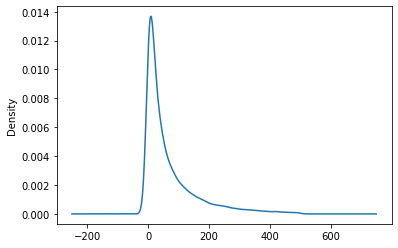

In [5]:
# Plot distribution of values in a column
erna_norm_gt_500['Dave__BSA__1__PRO'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

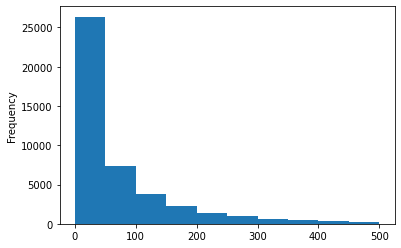

In [6]:
erna_norm_gt_500['Dave__BSA__1__PRO'].plot(kind='hist')

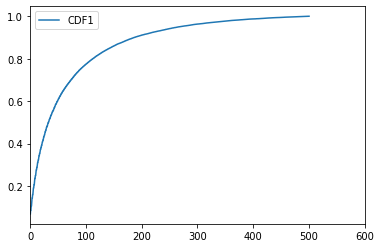

In [7]:
array1 = erna_norm_gt_500['Dave__BSA__1__PRO'].to_numpy()

# getting data of the histogram
count1, bins_count1 = np.histogram(array1, bins=1000)

# finding the probility distribution fxn (PDF) of the histogram using count values
pdf1 = count1 / sum(count1)

# using numpy np.cumsum to calculate the CDF
cdf1 = np.cumsum(pdf1)

# plotting PDF and CDF
# plt.plot(bins_count1[1:], pdf1, color="red", label="PDF")
plt.plot(bins_count1[1:], cdf1, label="CDF1")

plt.xlim([0, 600])
plt.legend()
plt.show()

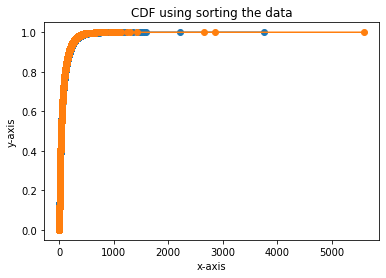

In [9]:
array1 = erna_norm_gt_500['Eric__BSA__1__PRO'].to_numpy()
array2 = erna_norm_gt_500['Khaondo__BSA__1__PRO'].to_numpy()
# N = 44506
N = 43561

# sort the data in ascending order
x1 = np.sort(array1)
x2 = np.sort(array2)

# get the cdf values of y
y = np.arange(N) / float(N)

# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')
  
plt.title('CDF using sorting the data')
  
plt.plot(x1, y, marker='o')  
plt.plot(x2, y, marker='o')
# plt.xlim([0, 700])

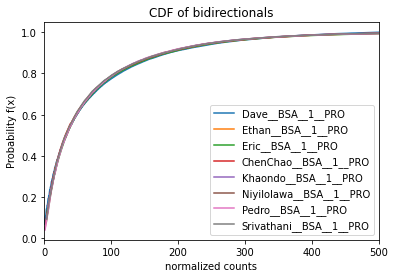

In [17]:
samples = erna_norm_gt_500.columns.values.tolist() 

fig = plt.figure()
ax = plt.subplot(111)
for sample in samples[1:16]:
    if ('BSA') in sample:
        array = erna_norm_gt_500[sample].to_numpy()
        count, bins_count = np.histogram(array, bins=1000)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        plt.plot(bins_count[1:], cdf, label=sample)
        ax.legend(loc='center left', bbox_to_anchor=(1, 1.5))
        plt.xlim([0, 500])
plt.legend()
plt.title('CDF of bidirectionals')
plt.xlabel("normalized counts")
plt.ylabel("Probability f(x)")
plt.show()
